# Decision Tree Classification
 
A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. 
It works by splitting the data into subsets based on the value of input features, creating a tree-like model of decisions.
Each internal node of the tree represents a test on a feature, each branch represents the outcome of the test, 
and each leaf node represents a class label (for classification) or a value (for regression).
 
Decision trees are easy to interpret and visualize, and they can handle both numerical and categorical data. 
However, they can be prone to overfitting, especially with complex datasets.



![Untitled picture.png](<attachment:Untitled picture.png>)
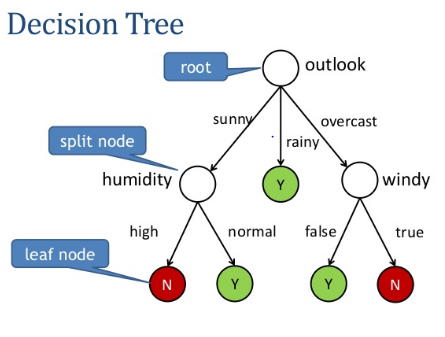

**Algorithm**

The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. ID3 uses Entropy and Information Gain to construct a decision tree.

## Entropy in Decision Trees
 
Entropy is a key concept used in building decision trees. It measures the amount of uncertainty or impurity in a dataset. In the context of decision trees, entropy helps determine how informative a particular feature is for classifying the data.
 
The entropy \( H \) for a dataset with classes \( c_1, c_2, ..., c_n \) is calculated as:
 
 \[
H(S) = -\sum_{i=1}^{n} p_i \log_2 p_i
 \]
 
where \( p_i \) is the proportion of samples in class \( c_i \).
 
- If all samples belong to a single class, entropy is 0 (pure).
- If the samples are evenly distributed among all classes, entropy is **maximal**.
 
In decision tree algorithms like ID3, the feature that results in the largest information gain (i.e., the largest reduction in entropy) is chosen for splitting at each step.


## Extra - what would be entropy if all classes are equally distributed?

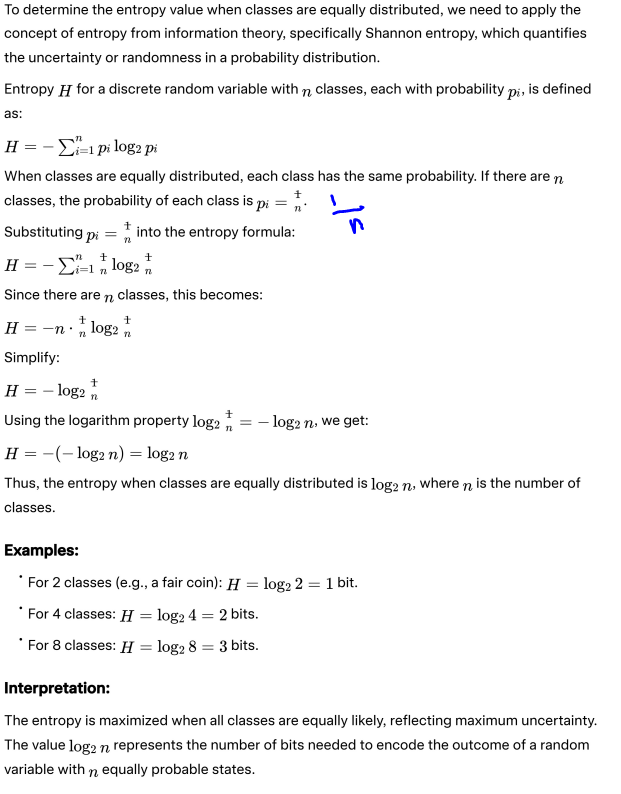

## Step-by-step: How a Decision Tree Works (Theory)

1. Start with the entire dataset as the root.
2. For each feature, calculate the potential "split" using a criterion such as information gain (entropy reduction) or Gini impurity.
    - Calculate entropy for dependent varaiable

      ![Untitled picture.png](<attachment:Untitled picture.png>)

    - Calculate entropy for all the independent varaiable. 
    - Calcualte information gain for all features
      Information gain = Entropy of class - Entropy of independent variable
    - The independet variable with highest information gain will be root node.
3. Select the feature and threshold that best splits the data (i.e., gives the highest information gain or lowest impurity).
4. Split the dataset into subsets based on the selected feature/threshold.
5. Repeat steps 2-4 recursively for each subset, treating each as a new node.
6. Stop splitting when:
    - All samples in a node belong to the same class, or
    - No features remain to split on, or
    - A stopping criterion (like maximum depth or minimum samples per node) is reached.
7. Assign a class label to each leaf node (usually the majority class of samples in that node).
 8. To classify a new sample, start at the root and follow the branches according to the sample's feature values until reaching a leaf node; the label at the leaf is the prediction.


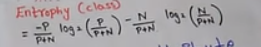

## Gini Impurity in Decision Trees
 
In addition to entropy, another popular criterion for splitting nodes in decision trees is **Gini impurity**.
 
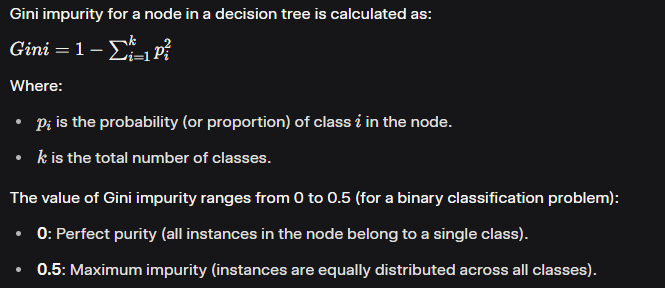
 
 - If all samples in a node belong to a single class, Gini impurity is 0 (pure).
 - If the samples are evenly distributed among all classes, Gini impurity is maximal (for two classes, the maximum is 0.5).
 
In the CART (Classification and Regression Trees) algorithm, Gini impurity is the default criterion for classification trees in scikit-learn. At each split, the feature and threshold that result in the lowest Gini impurity (i.e., the purest child nodes) are chosen.
 
**Summary:**
 - Both entropy and Gini impurity measure node impurity.
 - Gini is often slightly faster to compute and is the default in scikit-learn.
 - The choice between them usually has little effect on the resulting tree.


## Implementation using python

Test set accuracy (entropy criterion): 0.9736842105263158


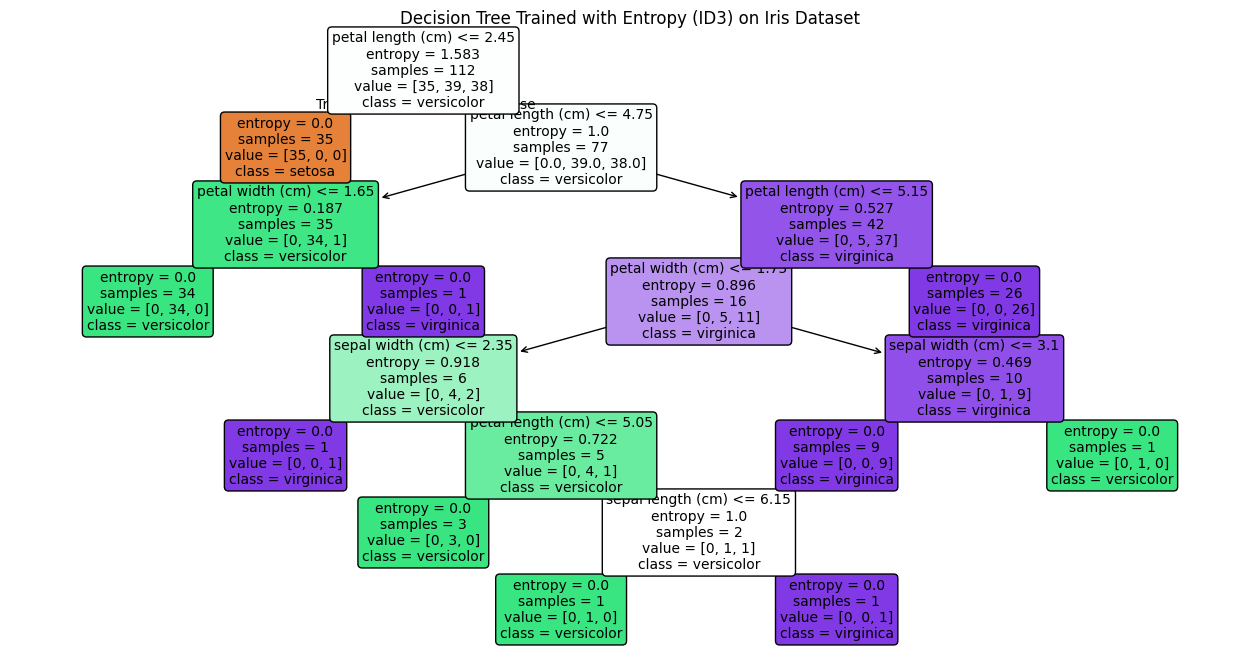

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load a sample dataset
X, y = load_iris(return_X_y=True)

# Split into train and test sets for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a Decision Tree Classifier using 'entropy' as the criterion
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Show accuracy
from sklearn.metrics import accuracy_score
print("Test set accuracy (entropy criterion):", accuracy_score(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(16,8))
plot_tree(
    clf, 
    feature_names=load_iris().feature_names, 
    class_names=load_iris().target_names, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Decision Tree Trained with Entropy (ID3) on Iris Dataset")
plt.show()



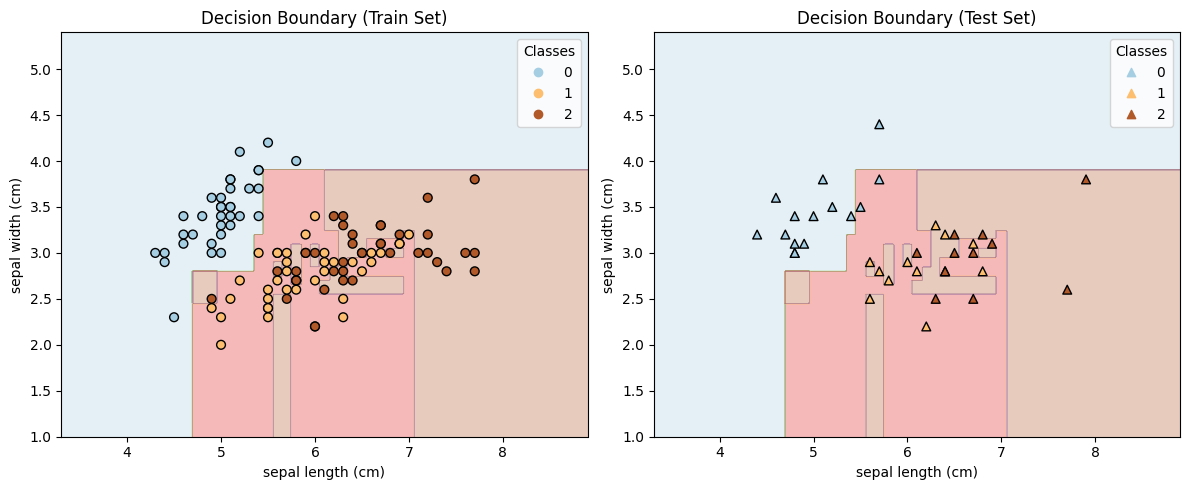

In [2]:
import numpy as np

# For visualization, reduce to 2 features (first two for simplicity)
X_vis = X[:, :2]
X_train_vis = X_train[:, :2]
X_test_vis = X_test[:, :2]

# Retrain a new classifier on just 2 features for visualization
clf_vis = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_vis.fit(X_train_vis, y_train)

# Create a mesh to plot decision boundaries
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
Z = clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 5))

# Plot train set boundaries
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', s=40)
plt.title("Decision Boundary (Train Set)")
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.legend(*scatter.legend_elements(), title="Classes")

# Plot test set boundaries
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolor='k', s=40, marker='^')
plt.title("Decision Boundary (Test Set)")
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])
plt.legend(*scatter.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()


## Decision Tree Parameters
 
The main parameters for a `DecisionTreeClassifier` in scikit-learn include:
 
- `criterion`: The function to measure the quality of a split. Common values are `"gini"` for the Gini impurity and `"entropy"` for the information gain.
- `max_depth`: The maximum depth of the tree. Limits the number of splits to prevent overfitting.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `max_features`: The number of features to consider when looking for the best split.
- `random_state`: Controls the randomness of the estimator for reproducibility.
 
**Example usage:**

 ```python
 from sklearn.tree import DecisionTreeClassifier
 
 clf = DecisionTreeClassifier(
     criterion='entropy',
     max_depth=3,
     min_samples_split=4,
     min_samples_leaf=2,
     max_features=2, # Default is None
     random_state=42
 )
 clf.fit(X_train, y_train)
 ```
 
 You can adjust these parameters to control the complexity and performance of your decision tree.



## Advantages and Disadvantages of Decision Trees
 
**Advantages:**
 - Easy to understand and interpret; can be visualized graphically.
 - Requires little data preprocessing (no need for feature scaling or normalization).
 - Can handle both numerical and categorical data.
 - Able to model non-linear relationships.
 - Can capture feature interactions automatically.
 - Works well even if some data is missing.
 
**Disadvantages:**
 - Prone to overfitting, especially with deep trees.
 - Small changes in data can result in a completely different tree (high variance).
 - Can be biased towards features with more levels (for categorical variables).
 - Not as accurate as ensemble methods (like Random Forests) for many real-world datasets.
 - Decision boundaries are always axis-parallel, which may not capture complex relationships as well as some other models.


 ## How to Avoid Overfitting in Decision Trees
 
 Overfitting occurs when a decision tree model learns the training data too well, including its noise and outliers, resulting in poor generalization to new data. Here are some strategies to prevent overfitting in decision trees:
 
 **1. Limit the Tree Depth (`max_depth`):**  
 Restricting the maximum depth of the tree reduces the model’s complexity and helps prevent it from learning noise in the training data.
 
 **2. Set Minimum Samples for Splitting (`min_samples_split`):**  
 By increasing the minimum number of samples required to split an internal node, you ensure splits only occur if there is enough data to support them.
 
 **3. Set Minimum Samples at a Leaf Node (`min_samples_leaf`):**  
 This parameter requires each leaf to have at least a minimum number of samples, which discourages overly specific leaves.
 
 **4. Limit the Number of Features Considered (`max_features`):**  
 Controlling the number of features to consider when looking for the best split can make the model less sensitive to noise.
 
 **5. Prune the Tree:**  
 Some decision tree implementations (such as `cost_complexity_pruning` in scikit-learn with `ccp_alpha`) allow you to prune branches that have little predictive power, simplifying the tree.
 
 **6. Use Ensemble Methods:**  
 While not part of a single decision tree, combining multiple trees using ensemble techniques like Random Forest or Gradient Boosted Trees can further reduce overfitting.
 
 **Example — controlling overfitting with hyperparameters:**
 ```python
 from sklearn.tree import DecisionTreeClassifier
 clf = DecisionTreeClassifier(max_depth=4, min_samples_split=10, min_samples_leaf=5, random_state=42)
 clf.fit(X_train, y_train)
 ```
 
 Tuning these parameters using cross-validation can help you find the best balance between model complexity and generalization.


## Pruning

Pruning in a decision tree means removing unnecessary branches that do not improve model performance on unseen data. It helps reduce overfitting and improves generalization.

There are two main types.

### Pre-pruning (Early stopping):

Stop growing the tree early based on conditions like:

	Minimum samples per leaf (min_samples_leaf)

	Maximum depth (max_depth)

	Minimum impurity decrease

Example (scikit-learn):

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)


### Post-pruning (Cost Complexity Pruning):

Grow the full tree first, then prune back branches using a cost function that balances accuracy and complexity.

Example:

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas

best_alpha = ccp_alphas[10]  # Example chosen alpha

pruned_clf = DecisionTreeClassifier(ccp_alpha=best_alpha)

pruned_clf.fit(X_train, y_train)



👉 In short:
	•	Goal: Simplify the model without losing much accuracy.
	•	Effect: Reduces variance, slightly increases bias → better generalization.

 ## Incremental Decision Trees
 
 Incremental decision trees, also known as online or streaming decision trees, are designed to handle data that arrives continuously or in batches, rather than all at once. Unlike traditional decision trees that require the full dataset upfront, incremental trees can update their structure and parameters as new data comes in.
 
 ### Key Points:
 - **Adaptability:** The tree grows and adapts as more data streams in, without needing to retrain from scratch.
 - **Efficiency:** Suitable for large or infinite datasets where storing all data is impractical.
 
 ### Popular Algorithms:
 - **Hoeffding Tree (VFDT):** Utilizes statistical bounds to decide when to split nodes, ensuring reliable decisions even with streaming data.
 - **Adaptive Random Forests:** An ensemble method that uses incremental trees for evolving data streams.
 
 
 
 ### When to Use:
 - For real-time analytics, fraud detection, or any scenario where data is too large or arrives continuously.
 
 > **Summary:** Incremental trees enable decision tree learning on streaming or evolving datasets—updating as new data arrives, without starting over.


In [ ]:
# Example of training an incremental (streaming) decision tree using the HoeffdingTreeClassifier from river

# NOTE: If you don't have 'river' installed, you can install it via pip:
# !pip install river

from river import tree
from river import metrics
from sklearn.datasets import make_classification

# Create a synthetic stream of data
X_stream, y_stream = make_classification(n_samples=500, n_features=4, n_classes=2, random_state=42)
feature_names = [f'feature_{i}' for i in range(X_stream.shape[1])]

# Convert to stream format: list of (dict, target) pairs
data_stream = [
    (dict(zip(feature_names, X_stream[i])), y_stream[i])
    for i in range(len(y_stream))
]

# Initialize a Hoeffding Tree (VFDT)
ht = tree.HoeffdingTreeClassifier()
acc = metrics.Accuracy()

# Simulate streaming/online learning
for x, y in data_stream:
    #y_pred = ht.predict_one(x)
    #acc = acc.update(y, y_pred)
    ht = ht.learn_one(x, y)

print(f"Accuracy after incremental learning: {acc.get():.3f}")
